In [1]:
!pip install pypyodbc
!pip install pyodbc

In [2]:
import pandas as pd
import numpy as np

In [3]:
import pyodbc as odbc 
import sqlite3
import matplotlib.pyplot as plt

In [4]:
# Task 1
data = pd.read_excel('WorldUniversity.xlsx')

In [5]:
# Task 2 
data.isnull().sum()

world_rank                 0
institution                0
country                    0
national_rank              0
quality_of_education       0
alumni_employment          0
quality_of_faculty         0
publications               0
influence                  0
citations                  0
broad_impact            1800
patents                    0
score                      0
year                       0
dtype: int64

In [6]:
df = data.drop_duplicates()

In [7]:
Connection_string = (

        r'DRIVER={ODBC Driver 17 for SQL Server};'
        r'SERVER= ASUS-ROG\SQLEXPRESS;'
        r'DATABASE=Mega-Project;'
        r'Trusted_Connection=yes;'

)

con = odbc.connect(Connection_string)
print(con)

In [8]:
from sqlalchemy.engine import URL 
connection_url = URL.create("mssql+pyodbc",
query = {"odbc_connect": Connection_string})

from sqlalchemy import create_engine
engine = create_engine(connection_url)

# Task 4 - SQL

In [9]:
import sqlalchemy as sa
with engine.begin() as conn:
    df= pd.read_sql_query(sa.text("SELECT TOP 10 * FROM world_rank"), conn)
    print(df)

   world_rank                            institution         country  \
0         1.0                     Harvard University             USA   
1         2.0  Massachusetts Institute of Technology             USA   
2         3.0                    Stanford University             USA   
3         4.0                University of Cambridge  United Kingdom   
4         5.0     California Institute of Technology             USA   
5         6.0                   Princeton University             USA   
6         7.0                   University of Oxford  United Kingdom   
7         8.0                        Yale University             USA   
8         9.0                    Columbia University             USA   
9        10.0     University of California, Berkeley             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                   7.0                9.0                 1.0   
1            2.0                   9.0       

In [10]:
# 1
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" select * from world_rank where country = 'USA'"), conn)
    print(df)


      world_rank                            institution country  \
0            1.0                     Harvard University     USA   
1            2.0  Massachusetts Institute of Technology     USA   
2            3.0                    Stanford University     USA   
3            5.0     California Institute of Technology     USA   
4            6.0                   Princeton University     USA   
...          ...                                    ...     ...   
5117       655.0                    University of Idaho     USA   
5118       656.0                Old Dominion University     USA   
5119       661.0              Portland State University     USA   
5120       665.0                  Loma Linda University     USA   
5121       668.0             University of Maine, Orono     USA   

      national_rank  quality_of_education  alumni_employment  \
0               1.0                   7.0                9.0   
1               2.0                   9.0               17.0   
2  

In [11]:
# 2
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" select top 10 * from world_rank where year = 2012 "), conn)
    print(df)


   world_rank                            institution         country  \
0         1.0                     Harvard University             USA   
1         2.0  Massachusetts Institute of Technology             USA   
2         3.0                    Stanford University             USA   
3         4.0                University of Cambridge  United Kingdom   
4         5.0     California Institute of Technology             USA   
5         6.0                   Princeton University             USA   
6         7.0                   University of Oxford  United Kingdom   
7         8.0                        Yale University             USA   
8         9.0                    Columbia University             USA   
9        10.0     University of California, Berkeley             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                   7.0                9.0                 1.0   
1            2.0                   9.0       

In [12]:
# 3
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" select top 10 * from world_rank where country = 'United Kingdom' and score>=80 and year = 2013 "), conn)
    print(df)


   world_rank              institution         country  national_rank  \
0         3.0     University of Oxford  United Kingdom            1.0   
1         5.0  University of Cambridge  United Kingdom            2.0   
2         3.0     University of Oxford  United Kingdom            1.0   
3         5.0  University of Cambridge  United Kingdom            2.0   
4         3.0     University of Oxford  United Kingdom            1.0   
5         5.0  University of Cambridge  United Kingdom            2.0   
6         3.0     University of Oxford  United Kingdom            1.0   
7         5.0  University of Cambridge  United Kingdom            2.0   
8         3.0     University of Oxford  United Kingdom            1.0   
9         5.0  University of Cambridge  United Kingdom            2.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   7.0               12.0                10.0          11.0   
1                   3.0             

In [13]:
# 4
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select country, count(*) as count_of_university from world_rank group by country order by count_of_university desc"), conn)
    print(df)


                 country  count_of_university
0                    USA                 5122
1                  China                 1457
2                  Japan                 1400
3         United Kingdom                 1279
4                Germany                 1026
5                 France                  961
6                  Italy                  852
7                  Spain                  709
8                 Canada                  640
9            South Korea                  635
10             Australia                  514
11                Taiwan                  401
12                Brazil                  313
13                 India                  272
14           Netherlands                  260
15           Switzerland                  233
16                Sweden                  216
17               Austria                  212
18                Israel                  197
19               Finland                  179
20               Belgium          

In [14]:
# 5 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select country, round(avg(score),2) as AVG_Score from world_rank where year = 2014 group by country order by AVG_Score desc"), conn)
    print(df)


                 country  AVG_Score
0                 Israel      52.14
1            Switzerland      51.66
2              Singapore      51.44
3                    USA      50.64
4                 Russia      49.10
5         United Kingdom      48.45
6            Netherlands      48.41
7                Denmark      48.35
8                 Sweden      48.25
9                 Canada      47.29
10               Belgium      47.26
11                 Japan      46.87
12          South Africa      46.70
13               Germany      46.65
14                Norway      46.60
15             Hong Kong      46.56
16           South Korea      46.37
17                France      46.33
18             Australia      46.05
19               Finland      45.86
20                 Italy      45.58
21               Ireland      45.35
22              Thailand      45.31
23              Malaysia      45.31
24           New Zealand      45.30
25                Mexico      45.29
26               Austria    

In [15]:
# 6 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where quality_of_education >= 20"), conn)
    print(df)


       world_rank                    institution  country  national_rank  \
0             9.0            Columbia University      USA            7.0   
1            12.0             Cornell University      USA           10.0   
2            13.0     University of Pennsylvania      USA           11.0   
3            14.0            University of Tokyo    Japan            1.0   
4            15.0       Johns Hopkins University      USA           12.0   
...           ...                            ...      ...            ...   
18819       668.0     University of Maine, Orono      USA          194.0   
18820       669.0  Graz University of Technology  Austria            8.0   
18821       670.0                Gifu University    Japan           43.0   
18822       671.0      University of JyvÃ¤skylÃ¤  Finland            8.0   
18823       672.0         University of Paris 13   France           29.0   

       quality_of_education  alumni_employment  quality_of_faculty  \
0                

In [16]:
# 7
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where score between 70 and 80"), conn)
    print(df)


     world_rank                            institution country  national_rank  \
0           8.0                        Yale University     USA            6.0   
1           9.0                    Columbia University     USA            7.0   
2          10.0     University of California, Berkeley     USA            8.0   
3          11.0                  University of Chicago     USA            9.0   
4          12.0                     Cornell University     USA           10.0   
..          ...                                    ...     ...            ...   
193        19.0               Johns Hopkins University     USA           14.0   
194        13.0                    University of Tokyo   Japan            1.0   
195        14.0             University of Pennsylvania     USA           11.0   
196        15.0  University of California, Los Angeles     USA           12.0   
197        16.0               Johns Hopkins University     USA           13.0   

     quality_of_education  

In [17]:
# 8 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select top 5 * from world_rank order by alumni_employment desc"), conn)
    print(df)

   world_rank                              institution country  national_rank  \
0        21.0      University of California, San Diego     USA           16.0   
1        26.0  University of California, San Francisco     USA           19.0   
2        29.0                   Rockefeller University     USA           21.0   
3        39.0            Weizmann Institute of Science  Israel            2.0   
4        71.0                     Karolinska Institute  Sweden            1.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                  36.0              567.0                19.0          16.0   
1                 367.0              567.0                20.0          22.0   
2                  49.0              567.0                12.0         372.0   
3                  19.0              567.0                22.0         246.0   
4                 149.0              567.0                36.0          51.0   

   influence  citations broad_im

In [18]:
# 9 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select top 1 * from world_rank where year = 2013 order by quality_of_faculty desc"), conn)
    print(df)

   world_rank              institution country  national_rank  \
0        28.0  Northwestern University     USA           21.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                 101.0               21.0               101.0          27.0   

   influence  citations broad_impact  patents  score    year  
0       26.0       24.0         None     30.0  56.12  2013.0  


In [19]:
# 10 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select count(*) as count_of_universities from world_rank where national_rank <=5"), conn)
    print(df)

   count_of_universities
0                   4679


In [20]:
# 11
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where quality_of_education = 1"), conn)
    print(df)

    world_rank             institution country  national_rank  \
0         21.0  Rockefeller University     USA           15.0   
1          1.0      Harvard University     USA            1.0   
2          1.0      Harvard University     USA            1.0   
3          1.0      Harvard University     USA            1.0   
4         21.0  Rockefeller University     USA           15.0   
5          1.0      Harvard University     USA            1.0   
6          1.0      Harvard University     USA            1.0   
7          1.0      Harvard University     USA            1.0   
8         21.0  Rockefeller University     USA           15.0   
9          1.0      Harvard University     USA            1.0   
10         1.0      Harvard University     USA            1.0   
11         1.0      Harvard University     USA            1.0   
12        21.0  Rockefeller University     USA           15.0   
13         1.0      Harvard University     USA            1.0   
14         1.0      Harva

In [21]:
# 12 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select top 10 * from world_rank order by citations desc"), conn)
    print(df)

   world_rank                                 institution      country  \
0       104.0                             Mines ParisTech       France   
1       226.0              National Cheng Kung University       Taiwan   
2       250.0  Moscow Institute of Physics and Technology       Russia   
3       341.0        Indian Institute of Technology Delhi        India   
4       351.0                         Wesleyan University          USA   
5       379.0                         University of Delhi        India   
6       383.0                         University of Turku      Finland   
7       389.0                   Xi'an Jiaotong University        China   
8       395.0                Innsbruck Medical University      Austria   
9       422.0                 Chonbuk National University  South Korea   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            5.0                 278.0               23.0               169.0   
1            2.0       

In [22]:
# 13 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select avg(influence) as AVG_influence_score from world_rank where country = 'USA'"), conn)
    print(df)

   AVG_influence_score
0           277.301835


In [23]:
# 14 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where broad_impact <= 50"), conn)
    print(df)

     world_rank                                    institution  \
0           1.0                             Harvard University   
1           2.0                            Stanford University   
2           3.0          Massachusetts Institute of Technology   
3           4.0                        University of Cambridge   
4           5.0                           University of Oxford   
..          ...                                            ...   
895        85.0                   Erasmus University Rotterdam   
896        87.0                             Utrecht University   
897        90.0  University of Texas MD Anderson Cancer Center   
898       121.0                     Baylor College of Medicine   
899       139.0                  University of Texas at Dallas   

            country  national_rank  quality_of_education  alumni_employment  \
0               USA            1.0                   1.0                1.0   
1               USA            2.0               

In [24]:
# 15 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where country = 'Japan'and score > 60 and year = 2012"), conn)
    print(df)

    world_rank          institution country  national_rank  \
0         14.0  University of Tokyo   Japan            1.0   
1         17.0     Kyoto University   Japan            2.0   
2         14.0  University of Tokyo   Japan            1.0   
3         17.0     Kyoto University   Japan            2.0   
4         14.0  University of Tokyo   Japan            1.0   
5         17.0     Kyoto University   Japan            2.0   
6         14.0  University of Tokyo   Japan            1.0   
7         17.0     Kyoto University   Japan            2.0   
8         14.0  University of Tokyo   Japan            1.0   
9         17.0     Kyoto University   Japan            2.0   
10        14.0  University of Tokyo   Japan            1.0   
11        17.0     Kyoto University   Japan            2.0   
12        14.0  University of Tokyo   Japan            1.0   
13        17.0     Kyoto University   Japan            2.0   
14        14.0  University of Tokyo   Japan            1.0   
15      

In [25]:
#  16
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT TOP 5 * FROM world_rank WHERE year = 2013 ORDER BY patents DESC "), conn)
    print(df)

   world_rank                              institution country  national_rank  \
0         8.0                     Princeton University     USA            6.0   
1         9.0                    University of Chicago     USA            7.0   
2        29.0                    University of Toronto  Canada            1.0   
3        36.0                  University of Paris-Sud  France            1.0   
4        37.0  University of California, Santa Barbara     USA           25.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   4.0               14.0                 3.0          58.0   
1                   9.0               19.0                 8.0          37.0   
2                  91.0               81.0                34.0           2.0   
3                  26.0              101.0                26.0          73.0   
4                 101.0              101.0                28.0          89.0   

   influence  citations broad_im

In [26]:
#  17
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT COUNT(*) AS quality_of_faculty FROM world_rank WHERE quality_of_faculty BETWEEN 5 AND 10"), conn)
    print(df)

   quality_of_faculty
0                 216


In [27]:
#  18
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT country, AVG(score) AS Avg_score FROM world_rank WHERE country = 'United Kingdom' AND year = 2014 GROUP BY country "), conn)
    print(df)

          country  Avg_score
0  United Kingdom  48.445937


In [28]:
#  19
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE year = 2012 AND national_rank BETWEEN 1 AND 3 "), conn)
    print(df)

     world_rank                            institution         country  \
0           1.0                     Harvard University             USA   
1           2.0  Massachusetts Institute of Technology             USA   
2           3.0                    Stanford University             USA   
3           4.0                University of Cambridge  United Kingdom   
4           7.0                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
310        91.0                     University of Oslo          Norway   
311        92.0               University of Queensland       Australia   
312        93.0               University of Copenhagen         Denmark   
313        94.0                   University of Sydney       Australia   
314        99.0                     Utrecht University     Netherlands   

     national_rank  quality_of_education  alumni_employment  \
0              1.0                   7.0        

In [29]:
#  20
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_Rank WHERE citations < 10 "), conn)
    print(df)

     world_rank                            institution country  national_rank  \
0           1.0                     Harvard University     USA            1.0   
1           2.0  Massachusetts Institute of Technology     USA            2.0   
2           3.0                    Stanford University     USA            3.0   
3          10.0     University of California, Berkeley     USA            8.0   
4          13.0             University of Pennsylvania     USA           11.0   
..          ...                                    ...     ...            ...   
319         7.0     University of California, Berkeley     USA            5.0   
320        15.0  University of California, Los Angeles     USA           12.0   
321        16.0               Johns Hopkins University     USA           13.0   
322        19.0      University of Michigan, Ann Arbor     USA           15.0   
323        32.0                  University of Toronto  Canada            1.0   

     quality_of_education  

In [30]:
#  21
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT TOP 1 * FROM world_rank WHERE year = 2013 ORDER BY alumni_employment DESC "), conn)
    print(df)

   world_rank                         institution country  national_rank  \
0        11.0  California Institute of Technology     USA            9.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   5.0              101.0                 7.0          38.0   

   influence  citations broad_impact  patents  score    year  
0       24.0       25.0         None     17.0  77.59  2013.0  


In [31]:
#  22
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT TOP 5 * FROM world_rank WHERE year = 2012 ORDER BY publications DESC "), conn)
    print(df)

   world_rank                                      institution country  \
0        18.0                    Weizmann Institute of Science  Israel   
1        21.0                           Rockefeller University     USA   
2        22.0                   Hebrew University of Jerusalem  Israel   
3        29.0  University of Texas Southwestern Medical Center     USA   
4        43.0                       Carnegie Mellon University     USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                   4.0              101.0                22.0   
1           15.0                   1.0              101.0                16.0   
2            2.0                  24.0               93.0                13.0   
3           21.0                  19.0              101.0                32.0   
4           31.0                  30.0               81.0                26.0   

   publications  influence  citations broad_impact  patents  score  

In [32]:
#  23
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT year, COUNT(*) AS count_of_university FROM world_rank GROUP BY year "), conn)
    print(df)

     year  count_of_university
0  2015.0                 8672
1  2014.0                 9000
2  2013.0                  900
3  2012.0                  900


In [33]:
#  24
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("SELECT ROUND(AVG(alumni_employment), 2) AS alumni_employment_score FROM world_rank WHERE country = 'USA' "), conn)
    print(df)

   alumni_employment_score
0                   256.01


In [34]:
#  25
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE broad_impact > 70"), conn)
    print(df)

       world_rank                                      institution  \
0            18.0  Swiss Federal Institute of Technology in Zurich   
1            22.0                   Hebrew University of Jerusalem   
2            24.0                        Seoul National University   
3            29.0                    University of Texas at Austin   
4            34.0                                  Keio University   
...           ...                                              ...   
16389       668.0                       University of Maine, Orono   
16390       669.0                    Graz University of Technology   
16391       670.0                                  Gifu University   
16392       671.0                        University of JyvÃ¤skylÃ¤   
16393       672.0                           University of Paris 13   

           country  national_rank  quality_of_education  alumni_employment  \
0      Switzerland            1.0                  16.0              105.0   
1  

In [35]:
#  26
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT TOP 10 * FROM world_rank WHERE year = 2014 ORDER BY influence DESC "), conn)
    print(df)

   world_rank                            institution country  national_rank  \
0       855.0        National Chung Cheng University  Taiwan           14.0   
1       865.0       Nanjing University of Technology   China           50.0   
2       904.0                    Jadavpur University   India           14.0   
3       928.0                   Feng Chia University  Taiwan           18.0   
4       947.0  Northwestern Polytechnical University   China           67.0   
5       950.0          Chung Shan Medical University  Taiwan           19.0   
6       960.0            Beijing Jiaotong University   China           69.0   
7       975.0        China Pharmaceutical University   China           72.0   
8       976.0             Tarbiat Modares University    Iran            7.0   
9       979.0  University of Pau and Pays de l'Adour  France           49.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                 355.0              478.0        

In [36]:
#  27
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE patents = 1"), conn)
    print(df)

    world_rank                            institution country  national_rank  \
0          2.0  Massachusetts Institute of Technology     USA            2.0   
1          4.0  Massachusetts Institute of Technology     USA            3.0   
2          3.0  Massachusetts Institute of Technology     USA            3.0   
3          3.0  Massachusetts Institute of Technology     USA            3.0   
4          2.0  Massachusetts Institute of Technology     USA            2.0   
5          4.0  Massachusetts Institute of Technology     USA            3.0   
6          3.0  Massachusetts Institute of Technology     USA            3.0   
7          3.0  Massachusetts Institute of Technology     USA            3.0   
8          2.0  Massachusetts Institute of Technology     USA            2.0   
9          4.0  Massachusetts Institute of Technology     USA            3.0   
10         3.0  Massachusetts Institute of Technology     USA            3.0   
11         3.0  Massachusetts Institute 

In [37]:
#  28
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT COUNT(*) AS broad_impact_count FROM world_rank WHERE broad_impact BETWEEN 20 AND 30 "), conn)
    print(df)

   broad_impact_count
0                 189


In [38]:
#  29
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT AVG(quality_of_faculty) AS avg_quality_of_faculty FROM world_rank WHERE country = 'United Kingdom' "), conn)
    print(df)

   avg_quality_of_faculty
0              166.068804


In [39]:
#  30
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE influence < 5 "), conn)
    print(df)

     world_rank                              institution country  \
0           1.0                       Harvard University     USA   
1           2.0    Massachusetts Institute of Technology     USA   
2           3.0                      Stanford University     USA   
3          24.0  University of California, San Francisco     USA   
4           1.0                       Harvard University     USA   
..          ...                                      ...     ...   
139         7.0       University of California, Berkeley     USA   
140         1.0                       Harvard University     USA   
141         2.0                      Stanford University     USA   
142         3.0    Massachusetts Institute of Technology     USA   
143         7.0       University of California, Berkeley     USA   

     national_rank  quality_of_education  alumni_employment  \
0              1.0                   7.0                9.0   
1              2.0                   9.0               17

In [40]:
#  31
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE score > 75 AND national_rank <= 10 AND year = 2013 "), conn)
    print(df)

     world_rank                            institution         country  \
0           1.0                     Harvard University             USA   
1           2.0                    Stanford University             USA   
2           3.0                   University of Oxford  United Kingdom   
3           4.0  Massachusetts Institute of Technology             USA   
4           5.0                University of Cambridge  United Kingdom   
..          ...                                    ...             ...   
112         9.0                  University of Chicago             USA   
113        10.0                        Yale University             USA   
114        11.0     California Institute of Technology             USA   
115        12.0             University of Pennsylvania             USA   
116        14.0                    University of Tokyo           Japan   

     national_rank  quality_of_education  alumni_employment  \
0              1.0                   1.0        

In [41]:
#  32
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT TOP 5 * FROM world_rank WHERE year = 2014 ORDER BY patents DESC "), conn)
    print(df)

   world_rank                         institution country  national_rank  \
0        35.0  Ã‰cole normale supÃ©rieure - Paris  France            1.0   
1        48.0   Lomonosov Moscow State University  Russia            1.0   
2        73.0                Karolinska Institute  Sweden            1.0   
3       116.0                     Lund University  Sweden            3.0   
4       124.0                  Uppsala University  Sweden            4.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   8.0              478.0                59.0         362.0   
1                  14.0              210.0                50.0         264.0   
2                 126.0              478.0                37.0          55.0   
3                 132.0              478.0               165.0          81.0   
4                  62.0              336.0               111.0          94.0   

   influence  citations broad_impact  patents  score    year  

In [42]:
#  33
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT COUNT(*) AS count_of_univ FROM world_rank WHERE alumni_employment > 50 "), conn)
    print(df)

   count_of_univ
0          18113


In [43]:
#  34
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT AVG(quality_of_education) AS avg_education_japan FROM world_rank WHERE country = 'Japan' "), conn)
    print(df)

   avg_education_japan
0           290.470714


In [44]:
#  35
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE quality_of_education = 1 AND year = 2014 "), conn)
    print(df)

   world_rank         institution country  national_rank  \
0         1.0  Harvard University     USA            1.0   
1         1.0  Harvard University     USA            1.0   
2         1.0  Harvard University     USA            1.0   
3         1.0  Harvard University     USA            1.0   
4         1.0  Harvard University     USA            1.0   
5         1.0  Harvard University     USA            1.0   
6         1.0  Harvard University     USA            1.0   
7         1.0  Harvard University     USA            1.0   
8         1.0  Harvard University     USA            1.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   1.0                1.0                 1.0           1.0   
1                   1.0                1.0                 1.0           1.0   
2                   1.0                1.0                 1.0           1.0   
3                   1.0                1.0                 1.0           1.0   

In [45]:
#  36
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE score > 80 AND alumni_employment < 5 "), conn)
    print(df)

    world_rank          institution country  national_rank  \
0          1.0   Harvard University     USA            1.0   
1          2.0  Stanford University     USA            2.0   
2          1.0   Harvard University     USA            1.0   
3          2.0  Stanford University     USA            2.0   
4         13.0  University of Tokyo   Japan            1.0   
..         ...                  ...     ...            ...   
58         1.0   Harvard University     USA            1.0   
59         2.0  Stanford University     USA            2.0   
60        13.0  University of Tokyo   Japan            1.0   
61         1.0   Harvard University     USA            1.0   
62         2.0  Stanford University     USA            2.0   

    quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                    1.0                1.0                 1.0           1.0   
1                   11.0                2.0                 4.0           6.0   
2           

In [46]:
#  37
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT TOP 10 * FROM world_rank WHERE year = 2013 ORDER BY publications DESC "), conn)
    print(df)

   world_rank                                      institution      country  \
0        21.0                   Hebrew University of Jerusalem       Israel   
1        33.0                    Weizmann Institute of Science       Israel   
2        46.0  University of Texas Southwestern Medical Center          USA   
3        49.0                           Rockefeller University          USA   
4        51.0                       Carnegie Mellon University          USA   
5        56.0                             University of Geneva  Switzerland   
6        64.0               Ã‰cole normale supÃ©rieure - Paris       France   
7        66.0      Technion â€“ Israel Institute of Technology       Israel   
8        70.0                                  Keio University        Japan   
9        73.0                         Arizona State University          USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0            1.0                  15.0           

In [47]:
#  38
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT COUNT(*) AS count_of_univ FROM world_rank WHERE broad_impact BETWEEN 40 AND 50 "), conn)
    print(df)

   count_of_univ
0            198


In [48]:
#  39
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT AVG(score) AS avg_score_of_univ FROM world_rank WHERE country = 'Australia' "), conn)
    print(df)

   avg_score_of_univ
0          45.850584


In [49]:
#  40
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" SELECT * FROM world_rank WHERE influence = 1 AND year = 2012 "), conn)
    print(df)

   world_rank         institution country  national_rank  \
0         1.0  Harvard University     USA            1.0   
1         1.0  Harvard University     USA            1.0   
2         1.0  Harvard University     USA            1.0   
3         1.0  Harvard University     USA            1.0   
4         1.0  Harvard University     USA            1.0   
5         1.0  Harvard University     USA            1.0   
6         1.0  Harvard University     USA            1.0   
7         1.0  Harvard University     USA            1.0   
8         1.0  Harvard University     USA            1.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                   7.0                9.0                 1.0           1.0   
1                   7.0                9.0                 1.0           1.0   
2                   7.0                9.0                 1.0           1.0   
3                   7.0                9.0                 1.0           1.0   

In [50]:
# 41
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text(" select * from world_rank where quality_of_faculty > 15 "),conn)
    print(df)

       world_rank                    institution  country  national_rank  \
0            13.0     University of Pennsylvania      USA           11.0   
1            14.0            University of Tokyo    Japan            1.0   
2            15.0       Johns Hopkins University      USA           12.0   
3            17.0               Kyoto University    Japan            2.0   
4            18.0  Weizmann Institute of Science   Israel            1.0   
...           ...                            ...      ...            ...   
18927       668.0     University of Maine, Orono      USA          194.0   
18928       669.0  Graz University of Technology  Austria            8.0   
18929       670.0                Gifu University    Japan           43.0   
18930       671.0      University of JyvÃ¤skylÃ¤  Finland            8.0   
18931       672.0         University of Paris 13   France           29.0   

       quality_of_education  alumni_employment  quality_of_faculty  \
0                

In [51]:
# 42 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select top 5 * from world_rank where year = 2014 order by alumni_employment desc"), conn)
    print(df)

   world_rank                              institution country  national_rank  \
0        20.0      University of California, San Diego     USA           15.0   
1        27.0  University of California, San Francisco     USA           20.0   
2        35.0       Ã‰cole normale supÃ©rieure - Paris  France            1.0   
3        37.0                   Rockefeller University     USA           25.0   
4        38.0            Weizmann Institute of Science  Israel            2.0   

   quality_of_education  alumni_employment  quality_of_faculty  publications  \
0                  32.0              478.0                20.0          16.0   
1                 355.0              478.0                23.0          24.0   
2                   8.0              478.0                59.0         362.0   
3                  72.0              478.0                14.0         347.0   
4                  18.0              478.0                22.0         233.0   

   influence  citations broad_im

In [52]:
# 43 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select count(*) as nos_of_University from world_rank where national_rank < 20 and year = 2013"), conn)
    print(df)

   nos_of_University
0                558


In [53]:
# 44
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select avg(citations) as avg_citations from world_rank where country = 'Germany'"), conn)
    print(df)

   avg_citations
0     362.476608


In [54]:
# 45
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where publications = 1"), conn)
    print(df)

    world_rank         institution country  national_rank  \
0          1.0  Harvard University     USA            1.0   
1          1.0  Harvard University     USA            1.0   
2          1.0  Harvard University     USA            1.0   
3          1.0  Harvard University     USA            1.0   
4          1.0  Harvard University     USA            1.0   
5          1.0  Harvard University     USA            1.0   
6          1.0  Harvard University     USA            1.0   
7          1.0  Harvard University     USA            1.0   
8          1.0  Harvard University     USA            1.0   
9          1.0  Harvard University     USA            1.0   
10         1.0  Harvard University     USA            1.0   
11         1.0  Harvard University     USA            1.0   
12         1.0  Harvard University     USA            1.0   
13         1.0  Harvard University     USA            1.0   
14         1.0  Harvard University     USA            1.0   
15         1.0  Harvard 

In [55]:
# 46
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where broad_impact > 60 and national_rank <= 5"), conn)
    print(df)

      world_rank                                      institution  \
0           18.0  Swiss Federal Institute of Technology in Zurich   
1           22.0                   Hebrew University of Jerusalem   
2           24.0                        Seoul National University   
3           34.0                                  Keio University   
4           35.0               Ã‰cole normale supÃ©rieure - Paris   
...          ...                                              ...   
3414       641.0                             University of Patras   
3415       646.0                  Warsaw University of Technology   
3416       652.0               University of Los Andes (Colombia)   
3417       658.0                                Massey University   
3418       667.0                           University of Debrecen   

          country  national_rank  quality_of_education  alumni_employment  \
0     Switzerland            1.0                  16.0              105.0   
1          Israel

In [56]:
# 47
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select top 10 * from world_rank where year = 2012 order by quality_of_education desc"), conn)
    print(df)

   world_rank                                  institution country  \
0        24.0      University of California, San Francisco     USA   
1        30.0                University of Texas at Austin     USA   
2        33.0                      Northwestern University     USA   
3        35.0                        University of Toronto  Canada   
4        36.0  University of North Carolina at Chapel Hill     USA   
5        39.0           University of Washington - Seattle     USA   
6        40.0      University of California, Santa Barbara     USA   
7        44.0            University of Southern California     USA   
8        47.0             University of California, Irvine     USA   
9        49.0         University of Minnesota, Twin Cities     USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0           17.0                 101.0              101.0                21.0   
1           22.0                 101.0               78.0          

In [57]:
# 48 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select count(*) as score_greaterThan_90 from world_rank where score > 90"), conn)
    print(df)

   score_greaterThan_90
0                   207


In [58]:
# 49
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select avg(influence) as avg_influence from world_rank where country = 'United Kingdom'"), conn)
    print(df)

   avg_influence
0     343.802971


In [59]:
# 50
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select * from world_rank where quality_of_education <= 5 and year = 2014"), conn)
    print(df)

    world_rank                            institution         country  \
0          1.0                     Harvard University             USA   
1          3.0  Massachusetts Institute of Technology             USA   
2          4.0                University of Cambridge  United Kingdom   
3          7.0     University of California, Berkeley             USA   
4          9.0                   Princeton University             USA   
5          1.0                     Harvard University             USA   
6          3.0  Massachusetts Institute of Technology             USA   
7          4.0                University of Cambridge  United Kingdom   
8          7.0     University of California, Berkeley             USA   
9          9.0                   Princeton University             USA   
10         1.0                     Harvard University             USA   
11         3.0  Massachusetts Institute of Technology             USA   
12         4.0                University of Cambrid

In [60]:
# test_query 
with engine.begin() as conn:
    df = pd.read_sql_query(sa.text("select count(*) from world_rank where country = 'Japan' and year = 2012"), conn)
    print(df)

     
0  45


# Task 5 - Python

In [61]:
# 1 
total_count = len(data)
print("Total records in dataset :" ,total_count)

Total records in dataset : 19472


In [62]:
# 2
cols = data.shape[1]
print("Total Columns :", cols)

Total Columns : 14


In [63]:
# 3
typ = data['world_rank'].dtype
print("Datatype of world_rank :", typ)

Datatype of world_rank : int64


In [64]:
# 4
ctr = data['country'].mode().iloc[0]
print("Most featured country :", ctr)

Most featured country : USA


In [65]:
# 5
avg_edu = data['quality_of_education'].mean()
print("Average of quality_of_education : ", avg_edu)

Average of quality_of_education :  273.8289338537387


In [66]:
# 6 
inst = data.loc[data['alumni_employment'].idxmax()]
inst

world_rank                                               21
institution             University of California, San Diego
country                                                 USA
national_rank                                            16
quality_of_education                                     36
alumni_employment                                       567
quality_of_faculty                                       19
publications                                             16
influence                                                 5
citations                                                15
broad_impact                                           15.0
patents                                                  17
score                                                 66.59
year                                                   2015
Name: 1220, dtype: object

In [67]:
# 7 
endd = max(data['year'])
print("Dataset ends in year :", endd)

Dataset ends in year : 2015


In [68]:
# 8 
grp = data.groupby('country')
countt = len(grp)
print("Total unique countries in dataset :", countt)

Total unique countries in dataset : 59


In [69]:
# 9 

filter_year = 2012
print("Institution with highest score in year", filter_year) 
temp_data = data[data['year'] == filter_year]
temp_data.loc[data['score'].idxmax()]

Institution with highest score in year 2012


world_rank                               1
institution             Harvard University
country                                USA
national_rank                            1
quality_of_education                     7
alumni_employment                        9
quality_of_faculty                       1
publications                             1
influence                                1
citations                                1
broad_impact                           NaN
patents                                  5
score                                100.0
year                                  2012
Name: 0, dtype: object

In [70]:
# 10 

year2012 = 2012 
temp_data = data.loc[data['year'] == filter_year]
temp2 = temp_data.loc[data['institution'] == 'Harvard University']
print("National rank for 'Harvard University' in year",year2012,'=', temp2['world_rank'].iloc[0])

National rank for 'Harvard University' in year 2012 = 1


In [71]:
# 11

data_uk = data.loc[data['country'] == 'United Kingdom']
avg_value = data_uk['publications'].mean()
print("Avegrae publications value for institutions in United Kingdom :" ,avg_value)

Avegrae publications value for institutions in United Kingdom : 391.01016419077405


In [72]:
# 12 

year2013 = 2013
print("University with highest influence in :", year2013)
dt = data.loc[data['year'] == year2013]
dt.loc[dt['influence'].idxmax()]


University with highest influence in : 2013


world_rank                                   36
institution             University of Paris-Sud
country                                  France
national_rank                                 1
quality_of_education                         26
alumni_employment                           101
quality_of_faculty                           26
publications                                 73
influence                                   101
citations                                   101
broad_impact                                NaN
patents                                     101
score                                     51.72
year                                       2013
Name: 135, dtype: object

In [73]:
# 13 
bi = data['broad_impact']
mn =  bi.dropna().min()           
print("Minimum broad impact value in dataset :" ,mn)

Minimum broad impact value in dataset : 1.0


In [74]:
# 14

yr12 = 2012
jp_data = data.loc[(data['country'] == 'Japan') & (data['year'] == yr12)]
print(f"Total number of university in Japan in year {yr12} is : {len(jp_data)}")

Total number of university in Japan in year 2012 is : 45


In [75]:
# 15 

dt_usa = data.loc[(data['country'] == 'USA') & (data['year'] == yr12)]
print(f"Avegrage patents value for institutions in USA in year {yr12} {dt_usa['patents'].mean()}")

Avegrage patents value for institutions in USA in year 2012 56.293103448275865


In [76]:
# 16 

yr15 = 2015
cit = data.loc[data['year'] == yr15]
cit_lrg = cit.nlargest(5, 'citations')
cit_lrg

world_rank                                 institution country  \
1303         104                             Mines ParisTech  France   
1425         226              National Cheng Kung University  Taiwan   
1449         250  Moscow Institute of Physics and Technology  Russia   
1540         341        Indian Institute of Technology Delhi   India   
1550         351                         Wesleyan University     USA   

      national_rank  quality_of_education  alumni_employment  \
1303              5                   278                 23   
1425              2                   367                 52   
1449              2                    23                339   
1540              1                   367                 59   
1550            124                   154                 61   

      quality_of_faculty  publications  influence  citations  broad_impact  \
1303                 169           977        834        812         906.0   
1425                 218           164        485        812         388.0   
1449                 218           949        605        812        1000.0   
1540                 218           635        943        812         781.0   
1550                 218           983        506        812         850.0   

      patents  score  year  
1303      871  50.34  2015  
1425      436  46.97  2015  
1449      839  46.55  2015  
1540      625  45.54  2015  
1550      871  45.48  2015

In [77]:
# 17

# there is no such column : "international_students"

In [78]:
# 18 
# there is no income column but we can consider : low score = low income 

yr14 = 2014 
inc = data.loc[data['year'] == yr14]
income = inc.nsmallest(1, 'score')
print(f"Institution with lowest income in {yr14}")
income

Institution with lowest income in 2014


world_rank         institution country  national_rank  \
1199        1000  Yanbian University   China             84   

      quality_of_education  alumni_employment  quality_of_faculty  \
1199                   355                478                 210   

      publications  influence  citations  broad_impact  patents  score  year  
1199           890        790        800        1000.0      737  44.18  2014

In [79]:
# 19

miss_val = data['score'].isnull().sum()
print(f"Total missing values in score column : {miss_val}")

Total missing values in score column : 0


In [80]:
# 20

c_count = data['country'].value_counts()
c_count.head(3)

USA      5122
China    1457
Japan    1400
Name: country, dtype: int64

In [81]:
# 21

res_scr = data.loc[data['score'] > 70]
x = len(res_scr)
y = len(data)

percentage = (x/y)*100
print(f"percentage of institutions with score greater than 70 : {percentage:.2f}%")

percentage of institutions with score greater than 70 : 2.87%


In [82]:
# 22
# there is no year 2016 in data so i am calculating for year 2015
# aslo we dont have teaching score column so : teaching score = quality_of_education 

yr15 = 2015
MIT = 'Massachusetts Institute of Technology' 
SU = 'Stanford University'

data15 = data.loc[data['year'] == yr15]

mit = data15.loc[data15['institution'] == MIT].head(1)
su = data15.loc[data15['institution'] == SU].head(1)

mit_score =  mit['quality_of_education'].values[0]
su_score = su['quality_of_education'].values[0]
 
score = (su_score - mit_score)

print(f"Difference between teaching score between MIT and SU : {score}")

Difference between teaching score between MIT and SU : 6


In [83]:
# 22 OR

# there is no year 2016 in data so i am calculating for year 2015
# aslo we dont have teaching score column so : teaching score = score 

yr15 = 2015
MIT = 'Massachusetts Institute of Technology' 
SU = 'Stanford University'

data15 = data.loc[data['year'] == yr15]

mit = data15.loc[data15['institution'] == MIT].head(1)
su = data15.loc[data15['institution'] == SU].head(1)

mit_score =  mit['score'].values[0]
su_score = su['score'].values[0]
 
score = (su_score - mit_score)

print(f"Difference between teaching score between MIT and SU : {score:.2f}")

Difference between teaching score between MIT and SU : 1.12


In [84]:
# 23
# there is no data for year 2011, but just to get ouput i am trying with year 2012

rank = len(data.loc[(data['world_rank'] >= 50) & (data['world_rank'] <=100 ) & (data['year'] == 2012)])
print(f"Total institutions with world rank between 50 and 1oo in year 2012 : {rank}")


Total institutions with world rank between 50 and 1oo in year 2012 : 459


In [85]:
# 24

avg_scores = data.groupby('country')['score'].mean()
print("accoridng to the highest average score, country with the highest average industry_income across all years : ")
print(f"{avg_scores.idxmax()} : {avg_scores.max():.2f} ")


accoridng to the highest average score, country with the highest average industry_income across all years : 
Israel : 52.70 


In [86]:
# 25

usa_data = data.loc[data['country'] == 'USA']
std = usa_data['influence'].std()
print(f" standard deviation of research scores for institutions in the United States : {std:.2f} ") 

 standard deviation of research scores for institutions in the United States : 254.65 


In [87]:
# 26 

data15 = data.loc[data['year'] == yr15]
print("Institution with highest alumni_employment in 2105 : ")
data15.nlargest(1,'alumni_employment')

Institution with highest alumni_employment in 2105 : 


world_rank                          institution country  national_rank  \
1220          21  University of California, San Diego     USA             16   

      quality_of_education  alumni_employment  quality_of_faculty  \
1220                    36                567                  19   

      publications  influence  citations  broad_impact  patents  score  year  
1220            16          5         15          15.0       17  66.59  2015

In [88]:
# 27
# lets assume research = patents

corr = data['score'].corr(data['patents'])
print(f"Correlation between 'Score' and 'Research' : {corr} ")

Correlation between 'Score' and 'Research' : -0.4737216892717171 


In [89]:
# 28

data14 = data.loc[data['year'] == yr14]
data14.loc[data['broad_impact']>800]

world_rank                                institution       country  \
366           167                            Mines ParisTech        France   
506           307                        Wesleyan University           USA   
514           315            University of Science, Malaysia      Malaysia   
619           420                       King Saud University  Saudi Arabia   
627           428                          Sogang University   South Korea   
...           ...                                        ...           ...   
18795         996               National Dong Hwa University        Taiwan   
18796         997   National Taipei University of Technology        Taiwan   
18797         998                  Shaanxi Normal University         China   
18798         999  National University of Defense Technology         China   
18799        1000                         Yanbian University         China   

       national_rank  quality_of_education  alumni_employment  \
366                6                   249                 31   
506              117                   130                 54   
514                1                   355                478   
619                1                   355                133   
627               14                   355                478   
...              ...                   ...                ...   
18795             24                   355                478   
18796             25                   355                478   
18797             82                   355                478   
18798             83                   355                478   
18799             84                   355                478   

       quality_of_faculty  publications  influence  citations  broad_impact  \
366                   165           980        825        609         917.0   
506                   210           986        538        609         832.0   
514                   210           700        877        609         819.0   
619                   210           611        537        800         897.0   
627                   210           781        792        800         889.0   
...                   ...           ...        ...        ...           ...   
18795                 210           901        934        800         989.0   
18796                 210           867        987        800         994.0   
18797                 210           956        965        800         994.0   
18798                 210           860        973        800         999.0   
18799                 210           890        790        800        1000.0   

       patents  score  year  
366        737  48.81  2014  
506        737  46.30  2014  
514         42  46.23  2014  
619        115  45.45  2014  
627         68  45.43  2014  
...        ...    ...   ...  
18795      737  44.24  2014  
18796      737  44.24  2014  
18797      737  44.23  2014  
18798      637  44.21  2014  
18799      737  44.18  2014  

[1638 rows x 14 columns]

In [90]:
# 29 
# lets assume 1 patent for every student

aus_data = data.loc[data['country'] == 'USA']
avg_stud = aus_data['patents'].mean()
print(f"Avegrage international_student percentage for Australia is {avg_stud:.2f}%")

Avegrage international_student percentage for Australia is 293.75%


In [91]:
# 30 
# there is no year 2016 in dataset so answer will be (null)

yr16 = 2016
data16 = data.loc[data['year'] == yr16]
high_scr_16 = data16.nlargest(1,'score')
print(f"Institution with highest score in year 2016 is : ")
high_scr_16

Institution with highest score in year 2016 is : 


Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []

In [92]:
# 31
# there is female_male_ratio column in dataset

In [93]:
# 32

yr13 = 2013
data13 = data.loc[data['year'] == yr13]
scr_90 = data13.loc[data13['score'] > 90]
print(f"Institutions having score greater than 90 in the year 2013 : {len(scr_90)}")

Institutions having score greater than 90 in the year 2013 : 45


In [94]:
# 33
# there is no research_score column in dataset

top_10 = data15.nlargest(10,'score')
avg_top10 = top_10['influence'].mean()
print(f"average research score for institutions in the top 10 of score in 2015 : {avg_top10}")

average research score for institutions in the top 10 of score in 2015 : 1.2


In [95]:
# 34
#there is no international_students column in dataset

In [96]:
# 35 
# there is income coumn in dataset

In [97]:
# 36

res = len(data14.loc[data14['national_rank'] == 1])
print(f" Number of institutions having national_rank of 1 in the year 2014 : {res}")

 Number of institutions having national_rank of 1 in the year 2014 : 531


In [98]:
# 37 

# there is no information about international students in dataset 

In [99]:
# 38 

# there is no data of 2016 and there is no column teaching score

In [100]:
# 39 

high_scr = int(data['score'].nlargest(1))
res14 = data14.loc[data14['score'] == high_scr]
print("institution with the highest score in the year 2014")
res14

institution with the highest score in the year 2014


world_rank         institution country  national_rank  \
200             1  Harvard University     USA              1   
2400            1  Harvard University     USA              1   
4600            1  Harvard University     USA              1   
6800            1  Harvard University     USA              1   
9000            1  Harvard University     USA              1   
11200           1  Harvard University     USA              1   
13400           1  Harvard University     USA              1   
15600           1  Harvard University     USA              1   
17800           1  Harvard University     USA              1   

       quality_of_education  alumni_employment  quality_of_faculty  \
200                       1                  1                   1   
2400                      1                  1                   1   
4600                      1                  1                   1   
6800                      1                  1                   1   
9000                      1                  1                   1   
11200                     1                  1                   1   
13400                     1                  1                   1   
15600                     1                  1                   1   
17800                     1                  1                   1   

       publications  influence  citations  broad_impact  patents  score  year  
200               1          1          1           1.0        2  100.0  2014  
2400              1          1          1           1.0        2  100.0  2014  
4600              1          1          1           1.0        2  100.0  2014  
6800              1          1          1           1.0        2  100.0  2014  
9000              1          1          1           1.0        2  100.0  2014  
11200             1          1          1           1.0        2  100.0  2014  
13400             1          1          1           1.0        2  100.0  2014  
15600             1          1          1           1.0        2  100.0  2014  
17800             1          1          1           1.0        2  100.0  2014

In [101]:
# 40

res_15 = len(data15.loc[data15['world_rank'] > 200])
print(f"Number of institutions with world_rank greater than 200 in year 2015 : {res_15}")

Number of institutions with world_rank greater than 200 in year 2015 : 6872


In [102]:
# 41

mode_country = data['country'].mode().tolist()
print(f"Mode of country column : {mode_country}")

Mode of country column : ['USA']


In [103]:
# 42 
# there is industry_income column in dataset

In [104]:
# 43

bott_15 = data13.nlargest(10, 'world_rank')
avg_cit = bott_15['citations'].mean()
print(f"Average citation score for bottom 10 institutions : {avg_cit}")

Average citation score for bottom 10 institutions : 48.8


In [105]:
# 44
# there is no data available for 2016

data16 = data.loc[data['year'] == 2016]
res80 = data16.loc[data16['score'] > 80]
print(f"Number of institutions with score greater than 80 in 2016")
res80

Number of institutions with score greater than 80 in 2016


Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []

In [106]:
# 45

grp_data = data.groupby('country')['score'].mean()
res = grp_data.idxmin()
res2 = grp_data.min()
print(f"country with lowest average score of all time = {res} : {res2}")

country with lowest average score of all time = Romania : 44.1408


In [107]:
# 46
# there is international_students column in table

In [108]:
# 47 

res47 = data15.nlargest(1,'quality_of_faculty')
print(f"institution with the lowest teaching score in the year 2015 :")
res47

institution with the lowest teaching score in the year 2015 :


world_rank                institution      country  national_rank  \
1223          24  Seoul National University  South Korea              1   

      quality_of_education  alumni_employment  quality_of_faculty  \
1223                   367                  9                 218   

      publications  influence  citations  broad_impact  patents  score  year  
1223            36        163        146         112.0        6  64.82  2015

In [109]:
# 48
# there is no research column

ms_val = data['patents'].isnull().sum()
print(f"Total missing values in patents column : {ms_val} ")

Total missing values in patents column : 0 


In [110]:
# 49 
# there is no  female_male_ratio column in datset

In [111]:
# 50

res50 = data['influence'].max()
print(f"Highest influence score in dataset : {res50}")

Highest influence score in dataset : 991


# Task 6 - Visualization

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import altair as alt

In [113]:
# 1
data12 = data.loc[data['year'] == 2012]
data121 = data12.drop_duplicates()
data_top10 = data121.nlargest(10,'score')

x_ax = data_top10['institution']
y_ax = data_top10['score']

plt.bar(x_ax , y_ax)
plt.title('Top 10 universities by their scores in 2012')
plt.xticks(rotation='vertical')
plt.tight_layout()

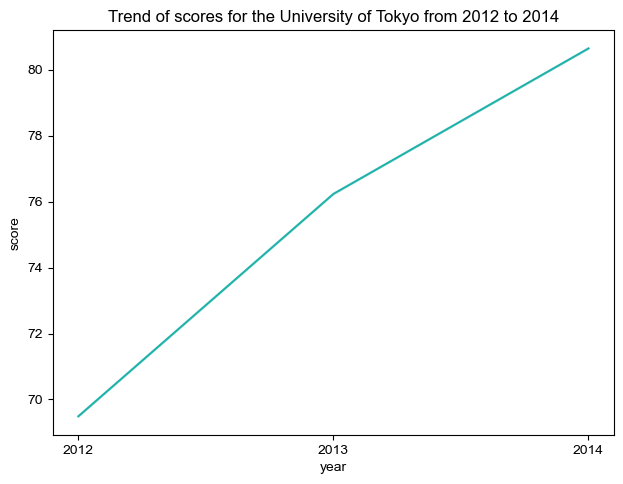

In [114]:
# 2

yr_data = data.loc[data['year'].isin([2012,2013,2014])]
tokyo_data = yr_data.loc[yr_data['institution'] == 'University of Tokyo']

sline = sns.lineplot(data = tokyo_data, x = 'year', y = 'score', color = 'lightseagreen')
sline.xaxis.set_major_locator(MaxNLocator(integer=True))
sns.set(rc={'figure.figsize':(7,3)})
plt.tight_layout()
plt.title('Trend of scores for the University of Tokyo from 2012 to 2014')
plt.show()

In [115]:
# 3

data13 = data.loc[data['year'] == 2013]

alt.Chart(data13).mark_circle(size = 50).encode(
    x = 'quality_of_faculty',
    y = 'alumni_employment', color = 'country').interactive()

alt.Chart(...)

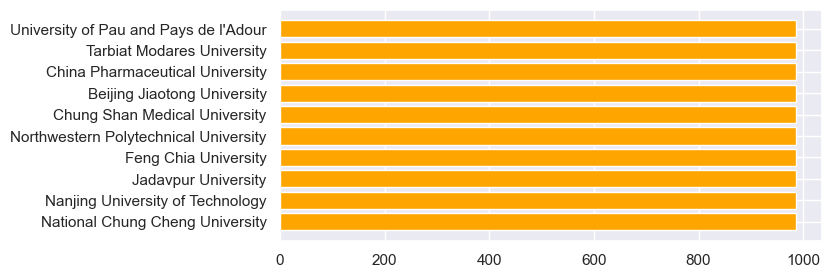

In [116]:
# 4

data14 = data.loc[data['year'] == 2014]
dt_inf = data14.nlargest(10,'influence')

inst = dt_inf['institution']
inf = dt_inf['influence']

plt.barh(inst,inf, color = 'orange')
plt.show()

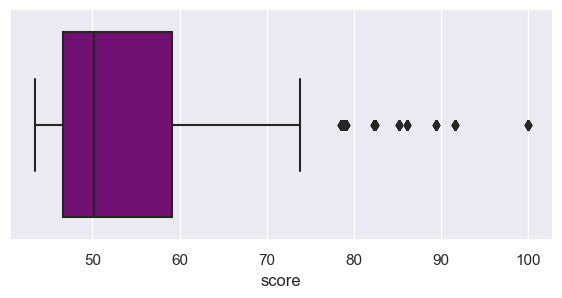

In [117]:
# 5

data12 = data.loc[data['year'] == 2012]

sns.boxplot(x='score', data=data12, color='purple')
plt.show()

In [118]:
# 6 

temp6 = yr_data.drop_duplicates()
top5uni = temp6.nsmallest(5,'world_rank')

alt.Chart(top5uni).mark_area().encode(
    x = 'year',
    y = 'score',
     color='institution:N'
).properties(width = 800, title = 'Change in scores for the top 5 universities from 2012 to 2014.')

alt.Chart(...)

In [119]:
# 7 

x = data13['country'].value_counts()
lbl = data13['country'].drop_duplicates()


fig , piep = plt.subplots()
piep.pie(x,labeldistance = 1.1, radius = 2, labels = lbl, rotatelabels=True)
plt.show()

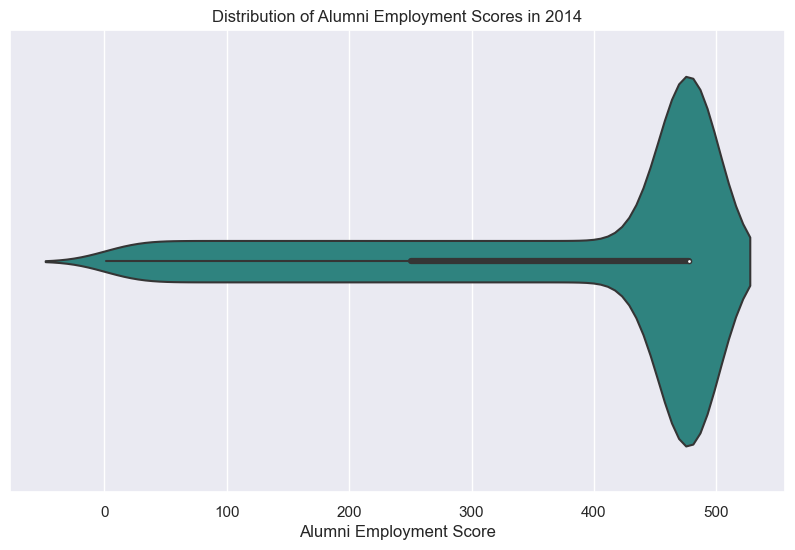

In [120]:
# 8

plt.figure(figsize=(10, 6))
sns.violinplot(data = data14, x = 'alumni_employment', palette='viridis')
plt.title('Distribution of Alumni Employment Scores in 2014')
plt.xlabel('Alumni Employment Score')
plt.show()

In [121]:
# 9 

srt = data14.drop_duplicates()
topdata14 = srt.nlargest(10, 'score').drop_duplicates()


alt.Chart(topdata14, title = 'top 10 universities with the highest scores in 2014').mark_bar(color = 'lightseagreen').encode(
    x = 'institution',
    y = 'score'
).properties(width = 600, height = 300, padding={"left": 50, "right": 50, "top": 40, "bottom": 20})


alt.Chart(...)

In [122]:
# 10 

x = data12['quality_of_education']
y = data12['quality_of_faculty']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s = 20, color = 'orange')
plt.xlabel('quality of education')
plt.ylabel('quality of faculty')
plt.title('correlation between the quality of education and the quality of faculty')
plt.show()

In [123]:
# 11

tmp = data13.drop_duplicates()
topdt13 = tmp.nsmallest(10, 'world_rank')

cols = ['score', 'influence', 'citations']


sns.pairplot(topdt13[cols], height=2)
plt.suptitle('Pair Plot of Scores, Influence, and Citations', y=1.02)
plt.show()

In [124]:
# 12

country_filter = data14.loc[data14['country'].isin(['USA', 'United Kingdom'])]
clean_data = country_filter.drop_duplicates()

alt.Chart(clean_data, title = 'universities in the United States and the United Kingdom').mark_bar().encode(
    x = 'institution',
    y = 'score',
    color = 'country'
)

alt.Chart(...)

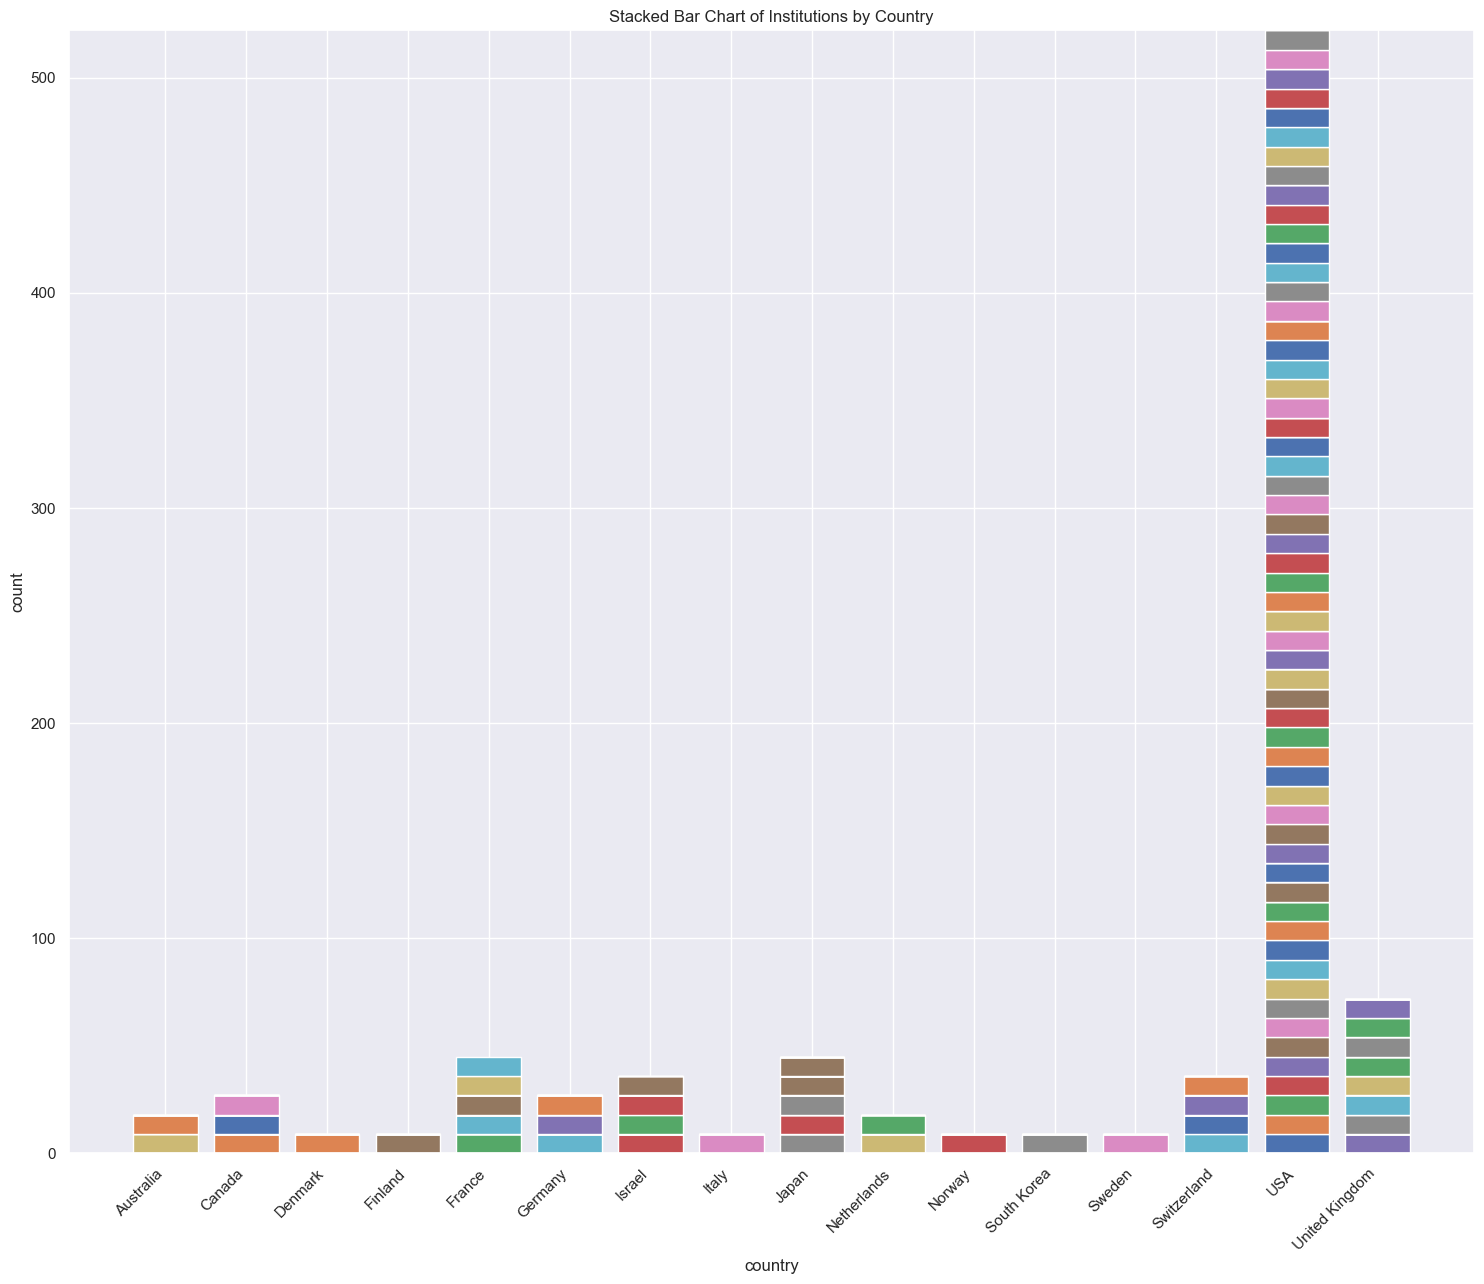

In [125]:
# 13

grp_data = data12.groupby(['country', 'institution']).size().unstack(fill_value=0)

plt.figure(figsize=(15,13))
bottom_counts = 0
for inst in grp_data.columns:
    plt.bar(grp_data.index, grp_data[inst], bottom=bottom_counts, label=inst)
    bottom_counts += grp_data[inst] 

plt.ylabel('count')
plt.xlabel('country')
plt.title('Stacked Bar Chart of Institutions by Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()


In [126]:
# 14

num_cols = data.select_dtypes(include=[np.number]).columns
corr_mat = data[num_cols].corr()

sns.heatmap(corr_mat, annot=True, cmap='PuOr', vmin=1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [127]:
# 15
import altair_viewer as av

data14 = data14.drop_duplicates()
top_5 = data14.nsmallest(5, 'world_rank')

alt.Chart(top_5).mark_line(color='lightseagreen').encode(
    x = 'institution:N',
    y = alt.Y("score:Q", scale=alt.Scale(domain=[40,130]))
).properties(title = "University Scores", width=500)


alt.Chart(...)

In [128]:
# 16

yax = data13.groupby('country')['score'].mean().tolist()
xax = data13['country'].drop_duplicates()

plt.figure(figsize=(10,6))
plt.bar(xax ,yax, color='teal')
plt.xticks(rotation=90, ha='right')
plt.show()

In [129]:
# 17 

d = data[data['year'] == 2014]
dt14 = d.drop_duplicates()
dt14 = dt14.nsmallest(25,'world_rank')

sns.swarmplot(size = 2, x = 'institution', y = 'score', data=dt14)

plt.xlabel('institution')
plt.ylabel('score')
plt.title('Distribution of scores among universities in 2014')
plt.xticks
plt.xticks(rotation=90, ha='right')
plt.show()

In [130]:
# 18 
import plotly.express as px

cz = data12.groupby('country')
vct = cz['institution'].value_counts()
df = vct.to_frame(name="value").reset_index()

fig = px.treemap(
    df,
    values="value",  
    names="institution",  
    path=["country"],  
    color="country",  
    color_continuous_scale="Viridis",
    title=" proportion of universities in each country in 2012",
)

fig.show()


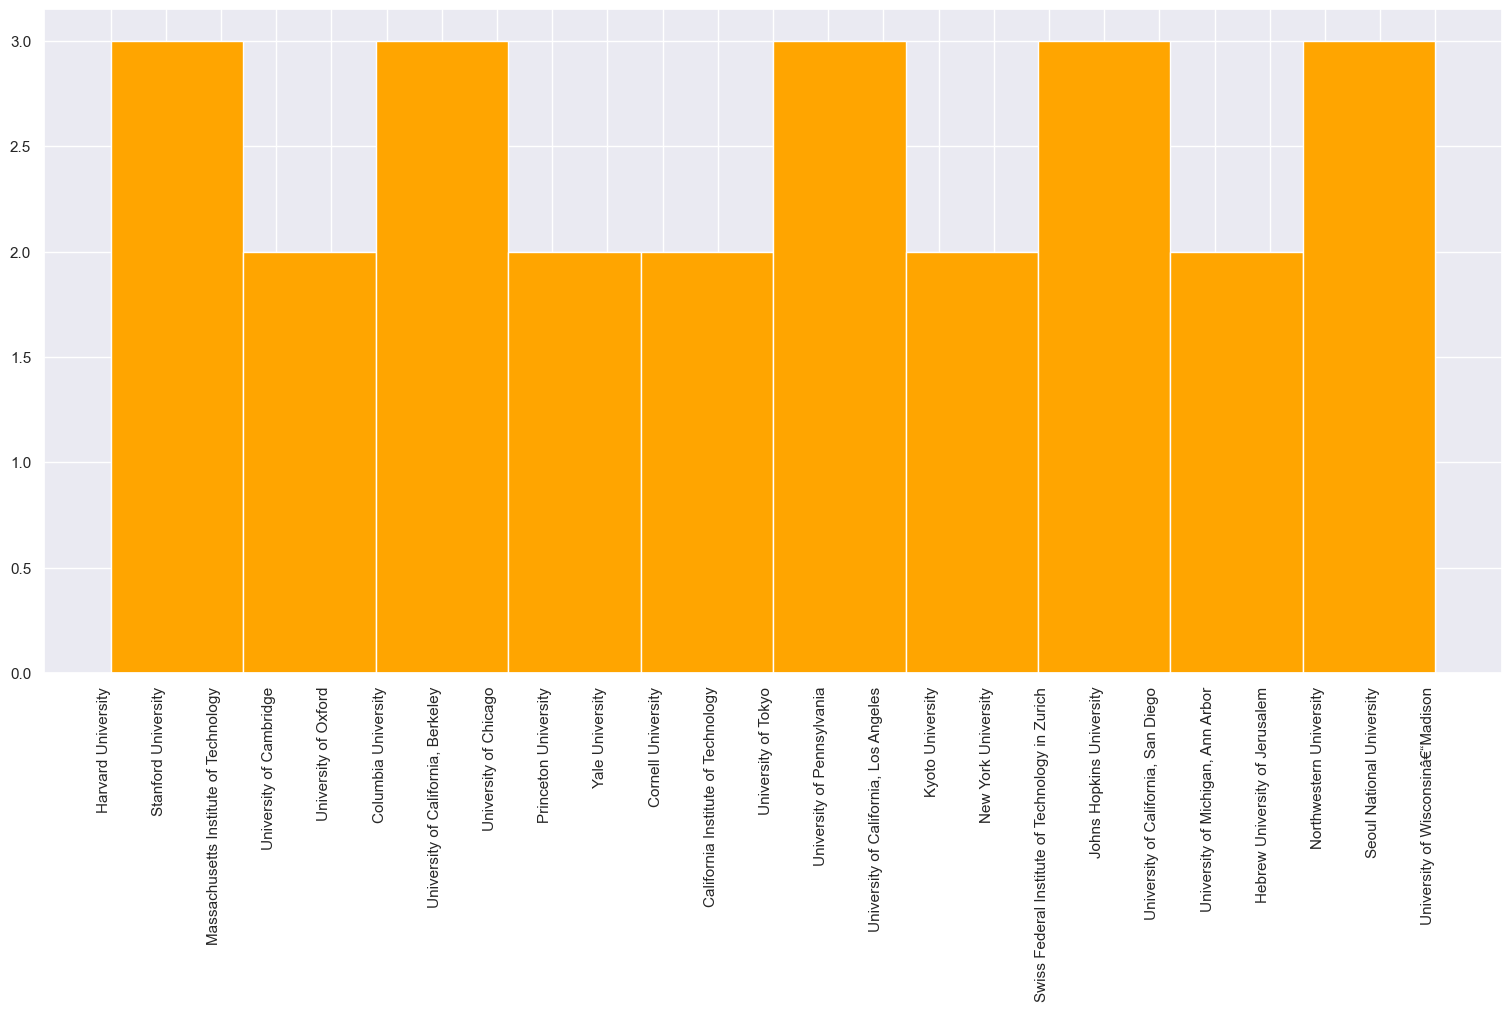

In [137]:
# 19 

his_data = data14.drop_duplicates()
top25his = his_data.nsmallest(25, 'world_rank')

x = top25his['score'].tolist()
y = top25his['institution'].tolist()

plt.figure(figsize=(15,10), constrained_layout=True)
plt.hist(data = top25his, x='institution', color='orange')
plt.xticks(rotation=90, ha='right')
plt.show()

In [172]:
# 20 

aus_cad = data13.loc[data13['country'].isin(['Australia', 'Canada'])]

plt.figure(figsize=(15,6))
alt.Chart(aus_cad).mark_bar().encode(
    x = 'institution:N',
    y = 'influence:Q',
    color='country'
).properties(title='Influence scores of universities in Canada and Australia in 2013', width=800, height=300)



alt.Chart(...)

<Figure size 1500x600 with 0 Axes>